## Analysis of Google Merchandise Store - Demographics (Gender, Age)

 - Who is the audience of the Google Merchandise Store?
 - How is the split between male/female?
 - How does this split compare to the distribution of Google employees worldwide from 2014 to 2019, by gender?
 - Who are the customers with regards to the age and sex?

**Import libraries**

In [1]:
import pandas as pd # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Matplotlib for drawing plots in Python
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib

**Read *csv**

Downloaded from:

https://analytics.google.com/analytics/web/#/savedreport/D-Xezi6rRW-0nhPOlRVW7Q/a54516992w87479473p92320289/_u.date00=20141001&_u.date01=20200229&_.advseg=&_.useg=&_.sectionId=&_.gSectionId=16312&_r.dsa=1&16311-table.secSegmentId=analytics.gender&16311-table.plotKeys=%5B%5D&16311-table.rowCount=500&16311-graphMode.mode=lineChart&16311-graphOptions.compareConcept=analytics.revenuePerTransaction/

In [2]:
df=pd.read_csv('Demographics_ Age_Gender_20141001-20200229.csv', skiprows=5, skipfooter=1982, engine='python')

**Show number of lines/columns of data frame**

In [3]:
df.shape

(12, 12)

**Show head and tail**

In [4]:
df.head(5)

,Age,Gender,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions,Revenue,Ecommerce Conversion Rate,Goal Conversion Rate
0,25-34,male,"482,345","452,492","652,534",41.00%,5.30,00:02:48,"12,222","$1,933,359.76",1.87%,25.74%
1,18-24,male,"311,710","298,265","385,927",46.43%,4.42,00:02:17,"3,366","$345,071.89",0.87%,18.38%
2,35-44,male,"260,897","247,069","366,554",39.39%,5.50,00:02:57,"10,060","$1,718,103.43",2.74%,29.12%
3,25-34,female,"209,810","196,366","294,480",41.93%,5.43,00:03:12,"7,114","$1,313,512.44",2.42%,26.93%
4,18-24,female,"140,928","133,969","178,169",49.86%,4.05,00:02:23,"1,624","$200,667.86",0.91%,16.71%


In [5]:
df.tail(5)
#to check that all lines are included

,Age,Gender,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions,Revenue,Ecommerce Conversion Rate,Goal Conversion Rate
7,55-64,male,"46,207","44,009","55,410",49.42%,4.10,00:02:09,675,"$81,556.50",1.22%,18.34%
8,45-54,female,"43,206","41,300","55,401",46.94%,5.08,00:02:57,775,"$103,495.22",1.40%,23.59%
9,65+,male,"35,572","33,976","40,625",56.76%,3.22,00:01:44,228,"$38,038.44",0.56%,11.47%
10,55-64,female,"25,074","24,171","31,549",53.57%,4.34,00:02:15,265,"$20,473.97",0.84%,17.90%
11,65+,female,"16,044","15,478","19,191",58.98%,3.15,00:01:37,146,"$23,917.51",0.76%,11.74%


**Show data types**

In [6]:
df.dtypes

Age                           object
Gender                        object
Users                         object
New Users                     object
Sessions                      object
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Transactions                  object
Revenue                       object
Ecommerce Conversion Rate     object
Goal Conversion Rate          object
dtype: object

**Cleaning columns/changing data types**

In [7]:
#cleaning columns to prepare for changing types

df['Users']=df['Users'].str.replace(",","")
df['New Users']=df['New Users'].str.replace(",","")
df['Sessions']=df['Sessions'].str.replace(",","")
df['Revenue']=df['Revenue'].str.replace(",","")
df['Revenue']=df['Revenue'].str.replace("$","")
df['Transactions']=df['Transactions'].str.replace(",","")

#cleaning columns + changing data type
df['Bounce Rate'] = df['Bounce Rate'].str.rstrip('%').astype('float') / 100.0
df['Ecommerce Conversion Rate'] = df['Ecommerce Conversion Rate'].str.rstrip('%').astype('float') / 100.0
df['Goal Conversion Rate'] = df['Goal Conversion Rate'].str.rstrip('%').astype('float') / 100.0

In [8]:
#changing types of columns

df["Users"] = df["Users"].astype(int)
df["New Users"] = df["New Users"].astype(int)
df["Sessions"] = df["Sessions"].astype(int)
df["Revenue"] = df["Revenue"].astype(float)
df['Transactions'] = df['Transactions'].astype(float)

#Ignore:
#df["Avg. Session Duration"] = pd.to_timedelta(df["Avg. Session Duration"])
#df["Avg. Session Duration"] = df["Avg. Session Duration"].apply(lambda x: pd.to_datetime(str(x), format='%H:%M:%S))

In [9]:
#check updated data types

df.dtypes

Age                           object
Gender                        object
Users                          int64
New Users                      int64
Sessions                       int64
Bounce Rate                  float64
Pages / Session              float64
Avg. Session Duration         object
Transactions                 float64
Revenue                      float64
Ecommerce Conversion Rate    float64
Goal Conversion Rate         float64
dtype: object

**Show updated head of DataFrame**

In [10]:
df.head(12)

,Age,Gender,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions,Revenue,Ecommerce Conversion Rate,Goal Conversion Rate
0,25-34,male,482345,452492,652534,0.4100,5.30,00:02:48,12222.0,1933359.76,0.0187,0.2574
1,18-24,male,311710,298265,385927,0.4643,4.42,00:02:17,3366.0,345071.89,0.0087,0.1838
2,35-44,male,260897,247069,366554,0.3939,5.50,00:02:57,10060.0,1718103.43,0.0274,0.2912
3,25-34,female,209810,196366,294480,0.4193,5.43,00:03:12,7114.0,1313512.44,0.0242,0.2693
4,18-24,female,140928,133969,178169,0.4986,4.05,00:02:23,1624.0,200667.86,0.0091,0.1671
5,45-54,male,106871,99747,136331,0.4370,4.98,00:02:31,2882.0,432043.43,0.0211,0.2390
6,35-44,female,89741,84697,125851,0.4311,5.49,00:03:08,3238.0,729248.65,0.0257,0.2859
7,55-64,male,46207,44009,55410,0.4942,4.10,00:02:09,675.0,81556.50,0.0122,0.1834
8,45-54,female,43206,41300,55401,0.4694,5.08,00:02:57,775.0,103495.22,0.0140,0.2359
9,65+,male,35572,33976,40625,0.5676,3.22,00:01:44,228.0,38038.44,0.0056,0.1147


**Compute a summary of statistics pertaining to the numerical DataFrame columns**

In [11]:
df.describe()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,Goal Conversion Rate
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000
mean,147367.083333,139294.916667,195168.500000,0.475908,4.588333,3549.583333,5.782908e+05,0.015225,0.210342
std,143587.636724,135233.208152,194013.595312,0.063084,0.842807,4089.377069,6.941077e+05,0.007823,0.061408
min,16044.000000,15478.000000,19191.000000,0.393900,3.150000,146.000000,2.047397e+04,0.005600,0.114700
25%,41297.500000,39469.000000,51707.000000,0.428150,4.087500,572.500000,7.067699e+04,0.008625,0.176025
50%,98306.000000,92222.000000,131091.000000,0.466850,4.700000,2253.000000,2.728699e+05,0.013100,0.209850
75%,222581.750000,209041.750000,312498.500000,0.507875,5.332500,4303.000000,8.753146e+05,0.021875,0.260375
max,482345.000000,452492.000000,652534.000000,0.589800,5.500000,12222.000000,1.933360e+06,0.027400,0.291200


## Check split male-female

In [12]:
#show split in total numbers
df.groupby(['Gender']).sum()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,Goal Conversion Rate
Gender,,,,,,,,,
female,524803,495981,704641,2.9439,27.54,13162.0,2391315.65,0.0890,1.2546
male,1243602,1175558,1637381,2.7670,27.52,29433.0,4548173.45,0.0937,1.2695


In [13]:
#Adding columns with percentage of numercial values of total

df['% Users Total'] = (df['Users']/df['Users'].sum())

df['% New Users Total'] = (df['New Users']/df['New Users'].sum())

df['% Sessions Total'] = (df['Sessions']/df['Sessions'].sum())

df['% Transactions Total'] = (df['Transactions']/df['Transactions'].sum())

df['% Revenue Total'] = (df['Revenue']/df['Revenue'].sum())

In [14]:
#show split in percentage
df.groupby(['Gender'])['% Users Total','% New Users Total', '% Sessions Total', '% Transactions Total', '% Revenue Total'].sum()

,% Users Total,% New Users Total,% Sessions Total,% Transactions Total,% Revenue Total
Gender,,,,,
female,0.296766,0.296721,0.300869,0.309003,0.344595
male,0.703234,0.703279,0.699131,0.690997,0.655405


- Over all categories, the split is roughly 70% male vs. 30% female
- Only in revenue, female users generate on average more revenue

- Compared to the employee split of Alphabet/Google, the numbers are on the same level

See: https://www.statista.com/statistics/311800/google-employee-gender-global/

## Plotting values, split by gender and age group

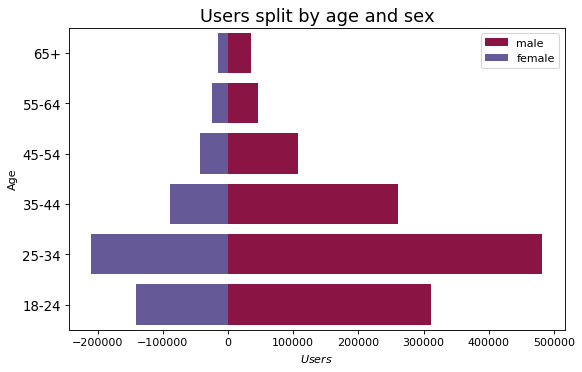

In [15]:
#modifying session values to be negative for females (see chart below)
df['Users'] = df.apply(lambda row: row['Users'] * -1 if row['Gender'] == 'female' else row['Users'], axis=1)
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
group_col = 'Gender'
#sort by column "age"
df = df.sort_values(by ='Age')
order_of_bars = df.Age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Age', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)
# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Users split by age and sex", fontsize=16)
plt.legend()
plt.show()

- In total more male users than female users
- for both male and female users, age group 25-34 has most users
    - Strongest age groups for female users are 25-34 followed by 18-24 years
    - Strongest age groups for male users are 25-34 followed by 18-24 years as well 

**Analysis of sessions**

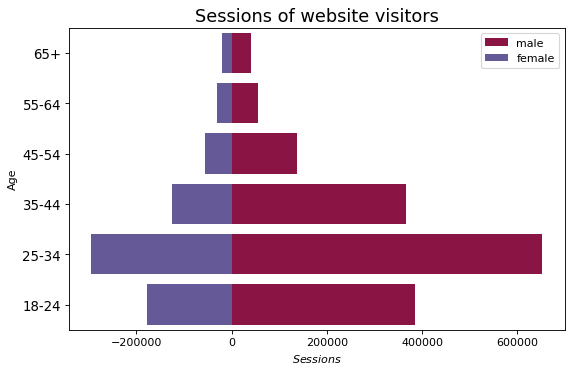

In [16]:
#modifying session values to be negative for females (see chart below)
df['Sessions'] = df.apply(lambda row: row['Sessions'] * -1 if row['Gender'] == 'female' else row['Sessions'], axis=1)
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
group_col = 'Gender'
#sort by column "age"
df = df.sort_values(by ='Age')
order_of_bars = df.Age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Sessions', y='Age', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)
# Decorations    
plt.xlabel("$Sessions$")
plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Sessions of website visitors", fontsize=16)
plt.legend()
plt.show()

- In total more sessions by male users than female users
- for both male and female users, age group 25-34 has most sessions
- Strongest age groups for female users are 25-34 followed by 18-24 years
- Strongest age groups for male users are 25-34 followed by 18-24 years as well but that age group is only slightly higher than the 35-44 year old male users whereas for female users this age group has a higher drop compared to 18-24 years


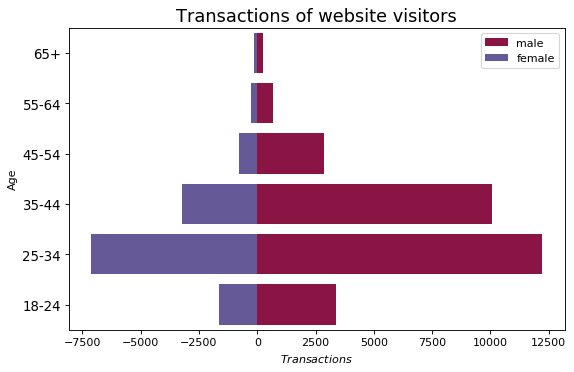

In [17]:
#modifying session values to be negative for females (see chart below)
df['Transactions'] = df.apply(lambda row: row['Transactions'] * -1 if row['Gender'] == 'female' else row['Transactions'], axis=1)
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
group_col = 'Gender'
#sort by column "age"
df = df.sort_values(by ='Age')
order_of_bars = df.Age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Transactions', y='Age', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)
# Decorations    
plt.xlabel("$Transactions$")
plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Transactions of website visitors", fontsize=16)
plt.legend()
plt.show()

- In total more transactions by male users than female users
- for both male and female users, age group 25-34 has most transactions
- Strongest age groups for female users are 25-34 followed by 35-44 years
- Strongest age groups for male users are 25-34 followed by 35-44 years as well 
- Compared to sessions, the second strongest age group for sessions (18-24), has now by far much less transactions
- This implies that those users are visiting the website but are not buying

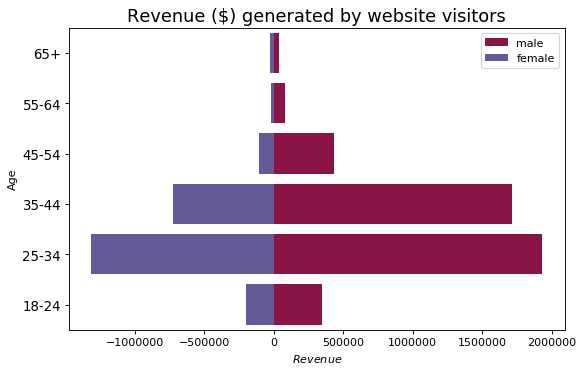

In [18]:
#modifying session values to be negative for females (see chart below)
df['Revenue'] = df.apply(lambda row: row['Revenue'] * -1 if row['Gender'] == 'female' else row['Revenue'], axis=1)
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
group_col = 'Gender'
#sort by column "age"
df = df.sort_values(by ='Age')
order_of_bars = df.Age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Revenue', y='Age', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)
# Decorations    
plt.xlabel("$Revenue$")
plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Revenue ($) generated by website visitors", fontsize=16)
plt.legend()
plt.show()

- Similar picture as for transactions
- In total more revenue generated by male users than female users
- for both male and female users, age group 25-34 generates most revenue
    - Strongest age groups for female users are 25-34 followed by 35-44 years
    - Strongest age groups for male users are 25-34 followed by 35-44 years as well but for male these groups are quite close whereas for female users there is a higher gap
- As there is an even higher drop in the generated revenue by the age group 18-24 compared to the drop of number of transactions as seen above, this proves that the 18-24 years old buy less/have less average spending
- The buyers are working employees, no students

**Change the manipulated values (=negative values) of columns Users, Sessions, Transactions, Revenue back to positive values only**

In [19]:
df['Users'] = df.apply(lambda row: row['Users'] * -1 if row['Gender'] == 'female' else row['Users'], axis=1)
df['Sessions'] = df.apply(lambda row: row['Sessions'] * -1 if row['Gender'] == 'female' else row['Sessions'], axis=1)
df['Transactions'] = df.apply(lambda row: row['Transactions'] * -1 if row['Gender'] == 'female' else row['Transactions'], axis=1)
df['Revenue'] = df.apply(lambda row: row['Revenue'] * -1 if row['Gender'] == 'female' else row['Revenue'], axis=1)

**Export as *.csv**

In [20]:
df.to_csv("google_merchandise_store_gender_age_clean.csv")

# Conclusions

**- Split of users (male vs. female) is same split as the gender split in Google**

**- Most users visiting the Google Merchandise Store and generating revenue are 25 - 44 years old**

**- This implies that those users are from working class, no students** 

**--> Based on the same split as the distribution of Google employees worldwide by gender and the fact that the buyers of products in the store are older than 25 years old, we can assume that those persons are Google employees**